# Does money buy happiness?

Student names: Thijs Slagter, Bibi de Marez Oyens, Tom de Lange, Dario Madau

Team number: J11

In [110]:
# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Load image from link

url = 'images/960x0.png'

# Set the desired image width and height
width = 800
height = 400

# Set the subtitle text
subtitle = "© Forbes - John Jennings"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© Forbes - John Jennings


For centuries, philosophers, theologians, and everyday people have pondered the age-old question: can money buy happiness? The answer, as with most things in life, is not a simple yes or no. While financial security undoubtedly plays a role in well-being, the relationship between money and happiness is complex and multifaceted.

On one side of the spectrum, individuals grounded in practicality argue that financial security is a fundamental building block for a happy life (Diener & Biswas-Diener, 2002). They point out that basic necessities like food, shelter, and healthcare are essential for survival and overall well-being. 

However, others posit that true happiness transcends material wealth (Aknin, Norton & Dunn, 2009). Proponents of this perspective emphasize the importance of intrinsic factors like strong social connections, meaningful relationships, and a sense of purpose (Frey & Stutzer, 2000). They argue that focusing solely on acquiring material wealth can lead to feelings of emptiness and dissatisfaction. 

To delve deeper into this complex question, we embark on a data-driven exploration. We will analyze economic and demographic data from various countries, exploring the correlation between "money" (meaning overall economic well-being) and national/individual happiness. By harnessing scientific research and statistical analysis, this project aims to shed light on whether financial prosperity paves the way for a happier world. 

### Economic welfare is the most important for the overall happiness of a country

Economic welfare stands as paramount for fostering overall happiness within a country and among its citizens. It encompasses ensuring access to basic necessities and a fair minimum wage, which are fundamental for a fulfilling life in contemporary society.


#### Essential services boost happiness

Economic welfare is important for the overall happiness of a country and its citizens. Things like minimum wage and access to important facilities like healthcare correlate with more happiness.

In [33]:
import plotly.express as px
import pandas as pd

# Laad de dataset
data = pd.read_csv('databases/merged_dataset2_updated.csv')

# Zet de dataset om naar lange vorm
data_long = pd.melt(
    data,
    id_vars=['Country', 'iso_a3'],
    value_vars=['Happiness Score 2015','Happiness Score 2016', 'Happiness Score 2017',
                 'Happiness Score 2018','Happiness Score 2019', 'Happiness Score 2020'],
    var_name='Year',
    value_name='Happiness Score'
)

# Extract jaar uit de variabelenaam
data_long['Year'] = data_long['Year'].str.extract('(\d+)').astype(int)

# Stel de kleurenschaal in met een vast bereik van 1 tot 7
fig = px.choropleth(
    data_long,
    locations='iso_a3',  # Gebruik de kolom met ISO 3166-1 alpha-3 landcodes
    color='Happiness Score',  # Gebruik de 'Happiness Score' kolom om kleuren te bepalen
    hover_name='Country',  # Toon de landnamen bij hover
    animation_frame='Year',  # Gebruik de 'Year' kolom voor de animatie
    color_continuous_scale=px.colors.sequential.Plasma,  # Kleurschaal
    title='Happiness Around the World Over Years 2015 Till 2020',
    range_color=(3, 8)  # Stel een consistente kleurenschaal in van 1 tot 7
)

fig.update_layout(
    margin=dict(l=10, r=10, t=40, b=0)  # Marges voor de grafiek
)

fig.show()


> *Figure 1: Happiness Around the World Over Years 2015 Till 2020.*

In [34]:
import plotly.express as px
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('databases/merged_dataset2_updated.csv')

# Verwijder speciale tekens en converteer de GDP kolom naar numerieke waarden
data['Logged GDP per capita'] = data['Logged GDP per capita'].replace('[\$,]', '', regex=True).astype(float)

# Maak een choropleth-kaart voor de geschaalde logaritmische GDP
fig = px.choropleth(
    data,
    locations='iso_a3',  # Gebruik de kolom met ISO 3166-1 alpha-3 landcodes
    color='Logged GDP per capita',  # Gebruik de geschaalde logaritmische 'GDP' kolom om kleuren te bepalen
    hover_name='Country',  # Toon de landnamen bij hover
    color_continuous_scale=px.colors.sequential.Plasma,  # Kleurschaal
    title='Scaled Logarithmic GDP per capita Around the World'
)

# Update layout to set background color
fig.update_layout(
    title_text='Logged GDP per capita Around the World in 2020',
    title_x=0.5,  # Center title horizontally
    title_y=0.95,  # Position title slightly above the plots
    title_font=dict(size=20),  # Increase font size
    geo=dict(
        bgcolor='rgba(0.87, 0.92, 0.97)',  # Set background color of the choropleth map
        showframe=False,  # Hide frame around map
    )
)

fig.show()


> *Figure 2: Logged GDP per capita Around the World in 2020.*

On the first map-graph we can see the happiness in most countries from 2020 till 2015, where the more yellow a country is, the more happy the people in the country are. On the second map-graph we can see how wealthy a country is divided by how many people live in that country. If you compare both maps you will see that most often, the more wealthy per person a country is, that more happiness is perceived in that country.

In [113]:
import plotly.graph_objs as go
import pandas as pd

# Load the correlation data
df = pd.read_csv('databases/score_correlations.csv')

# Create the bar trace
trace = go.Bar(
    x=df['Variable1'],
    y=df['Correlation'],
    marker=dict(color='rgba(0, 0, 255, 0.5)')  # Set marker color with transparency
)

# Create the figure and update layout with titles
fig = go.Figure(trace)
fig.update_layout(
    title='Correlations with Happiness in a country in 2020',
    title_x=0.5,  # Center title horizontally
    title_y=0.95,  # Position title slightly above the plot
    title_font=dict(size=20),  # Increase font size
    yaxis_title='Correlation with Happiness',
    xaxis_title='Different properties of a country',
    xaxis=dict(
        showgrid=True,  # Add grid lines to x-axis
        gridwidth=1,
        gridcolor='white'
    ),
    yaxis=dict(
        showgrid=True,  # Add grid lines to y-axis
        gridwidth=1,
        gridcolor='white'
    ),
)

# Display the figure
fig.show()


> *Figure 3: Correlations with Happiness in a country in 2020.*

This graph shows the correlations between different statistics of a country and how happy people are in that country. As you can see in this graph: logged GDP per capita, has the highest correlation with happiness. Which leads to a conclusion that wealth does give the most happiness. below you can see a detailed view of that.

In [114]:
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('databases/merged_dataset2_updated.csv')

# Extract relevant columns
df = df[['Country', 'Logged GDP per capita', 'Happiness Score 2020']]

# Convert to numeric, handling errors if any
df['Logged GDP per capita'] = pd.to_numeric(df['Logged GDP per capita'], errors='coerce')
df['Happiness Score 2020'] = pd.to_numeric(df['Happiness Score 2020'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Compute correlation coefficient
corr_social_support, _ = pearsonr(df['Logged GDP per capita'], df['Happiness Score 2020'])

# Create interactive scatter plot for Social Support vs Happiness Score
fig = px.scatter(df, x='Logged GDP per capita', y='Happiness Score 2020', 
                 title='Logged GDP per capita vs Happiness Score 2020',
                 labels={'Logged GDP per capita': 'Logged GDP per capita', 'Happiness Score 2020': 'Happiness Score 2020'},
                 hover_name='Country', hover_data={'Happiness Score 2020': ':.2f', 'Logged GDP per capita': ':.2f'})

fig.update_traces(marker=dict(color='green'))

# Add annotation for the correlation coefficient
fig.add_annotation(
    text=f'Correlation: {corr_social_support:.2f}',
    xref='paper', yref='paper',
    x=0.05, y=0.85,
    showarrow=False,
    font=dict(size=20, color='black'),
    align='left', bgcolor='rgba(255, 255, 255, 0.5)'
)

# Update layout with centered and larger title
fig.update_layout(
    title_text='Impact of Logged GDP per capita on Happiness in 2020',
    title_x=0.5,  # Center title horizontally
    title_y=0.95,  # Position title slightly above the plots
    title_font=dict(size=20),  # Increase font size
    showlegend=False
)

# Show the figure
fig.show()


> *Figure 4: Impact of Logged GDP per capita on Happiness in 2020.*

In this graph the correlation between GDP per capita and Happiness is shown in more detail. The data points, representing countries, show a consistent trend along the upward sloping line. This consistency suggests that the relationship between GDP per capita and happiness is relatively stable across different countries. Most countries follow the general trend, with fewer outliers, which highlights that higher GDP per capita is generally associated with higher happiness scores.


### Economic welfare is not the most important for the overall happiness of a country

Economic welfare is not the most important for the overall happiness of a country and its citizens. To experience happiness, you need to be socially satisfied.

To find out if there is a big correlation between social factors and happiness, we computed the Pearsons correlation coefficient. This is important to show the relevence of this second perspective.

In [115]:
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('databases/merged_dataset2_updated.csv')

# Extract relevant columns
df = df[['Country', 'Social support', 'Happiness Score 2020']]

# Convert to numeric, handling errors if any
df['Social support'] = pd.to_numeric(df['Social support'], errors='coerce')
df['Happiness Score 2020'] = pd.to_numeric(df['Happiness Score 2020'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Compute correlation coefficient
corr_social_support, _ = pearsonr(df['Social support'], df['Happiness Score 2020'])

# Create interactive scatter plot for Social Support vs Happiness Score
fig = px.scatter(df, x='Social support', y='Happiness Score 2020', 
                 title='Social Support vs Happiness Score 2020',
                 labels={'Social support': 'Social Support', 'Happiness Score 2020': 'Happiness Score 2020'},
                 hover_name='Country', hover_data={'Happiness Score 2020': ':.2f', 'Social support': ':.2f'})

fig.update_traces(marker=dict(color='blue'))

# Add annotation for the correlation coefficient
fig.add_annotation(
    text=f'Correlation: {corr_social_support:.2f}',
    xref='paper', yref='paper',
    x=0.05, y=0.85,
    showarrow=False,
    font=dict(size=20, color='black'),
    align='left', bgcolor='rgba(255, 255, 255, 0.5)'
)

# Update layout with centered and larger title
fig.update_layout(
    title_text='Impact of Social Support on Happiness in 2020',
    title_x=0.5,  # Center title horizontally
    title_y=0.95,  # Position title slightly above the plots
    title_font=dict(size=20),  # Increase font size
    showlegend=False
)

# Show the figure
fig.show()


> *Figure 5: The impact of social support and GDP per capita on the happiness score in 2020.*

The first plot displays all the data points (countries) between social support and happiness score, while the second plot shows the data points between GDP per capita and happiness score. The visibility of all data points allows us to observe the trends clearly. we notice that the data points between social support and happiness score cluster closely together at the top right, illustrating an exponential trend. This indicates that as social support increases, happiness scores rise significantly, highlighting the profound impact of strong social networks on well-being. We also see that the correlation coefficient seems to be 0.01 lower then the coefficient between GDP per capita and the happiness score if we look at Figure 4 which showcases the correlation between GDP per capita and happiness.
Because the difference is negligible, we can also conclude that social support is as important for the happiness of a country as the GDP per capita is.

#### High GDP per capita can mask inequality, reducing overall happiness

GDP per capita represents an average of the economic output per person within a country. However, it provides little insight into how this prosperity is distributed across the population. High GDP per capita can coexist with significant income inequality, where a small elite earns considerably more than the majority of the population. This disparity can lead to social tensions, feelings of injustice, and a reduced sense of well-being among a large segment of the population, despite a high average income. Consequently, this scenario often results in lower levels of happiness.

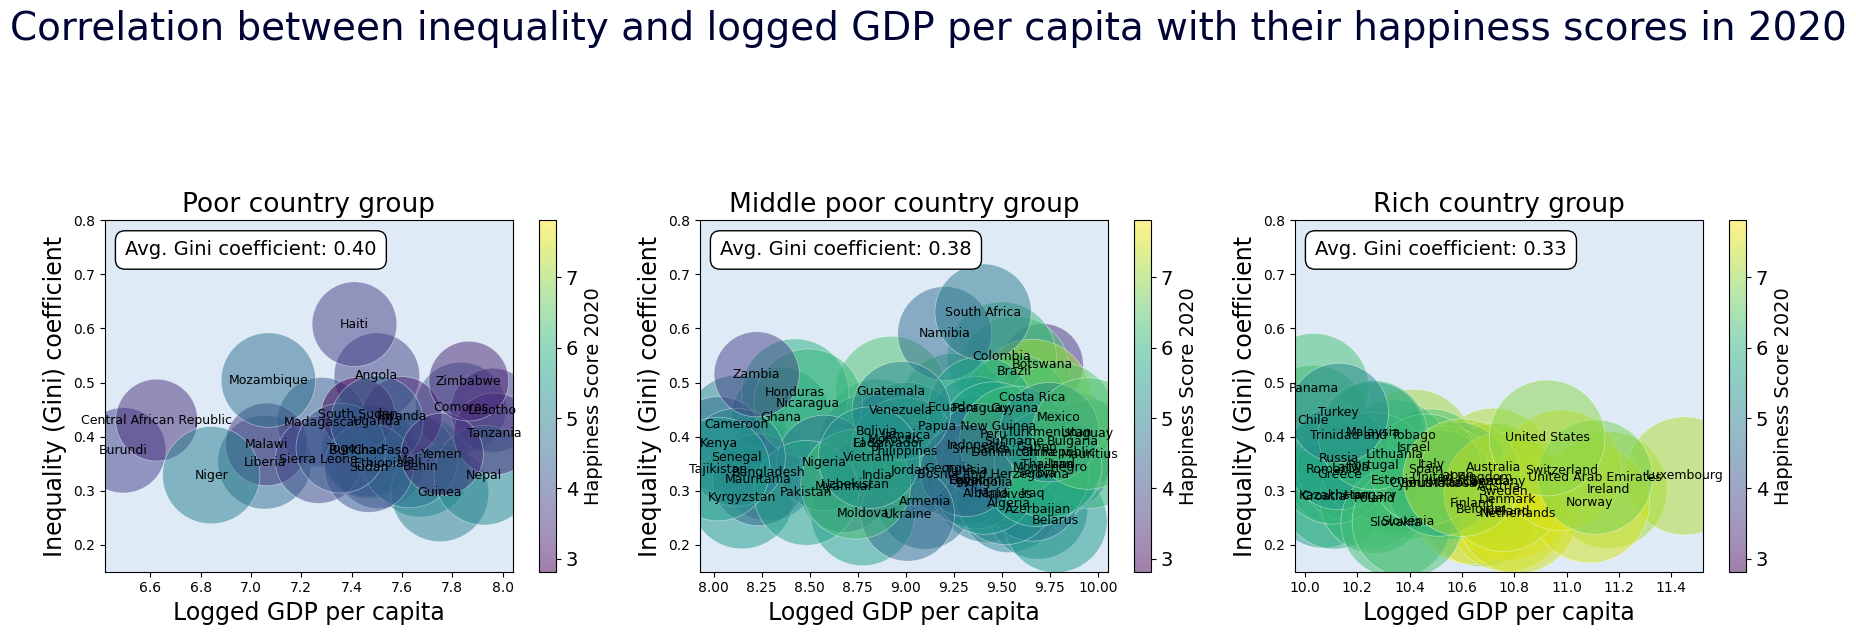

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'databases/merged_dataset2_updated.csv'
df = pd.read_csv(file_path)

# Define thresholds for GDP per capita to classify countries into three groups
gdp_thresholds = [8, 10]

# Define group labels
poor_group = 'Poor: GDP per capita < {}'.format(gdp_thresholds[0])
middle_group = 'Middle: {} <= GDP per capita < {}'.format(gdp_thresholds[0], gdp_thresholds[1])
rich_group = 'Rich: GDP per capita >= {}'.format(gdp_thresholds[1])

# Function to categorize GDP per capita into three groups
def categorize_gdp(gdp):
    if gdp < gdp_thresholds[0]:
        return poor_group
    elif gdp < gdp_thresholds[1]:
        return middle_group
    else:
        return rich_group

# Apply categorization to create a new column 'GDP Group'
df['GDP Group'] = df['Logged GDP per capita'].apply(categorize_gdp)

# Filter out rows where 'Logged GDP per capita' or 'Gini coefficient' are NaN or Inf
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Logged GDP per capita', 'Inequality (Gini) coefficient'])

# Split data into three groups based on GDP Group
group_poor = df[df['GDP Group'] == poor_group]
group_middle = df[df['GDP Group'] == middle_group]
group_rich = df[df['GDP Group'] == rich_group]

# Calculate the range of happiness scores and Gini coefficients for consistent scaling
min_happiness = df['Happiness Score 2020'].min()
max_happiness = df['Happiness Score 2020'].max()

# Create a function to plot each group with average Gini annotation
def plot_group(ax, df, title):
    # Define bubble sizes based on happiness score (multiplied for better visualization)
    bubble_sizes = df['Happiness Score 2020'] * 1000

    # Scatter plot with bubble size encoding
    scatter = ax.scatter(df['Logged GDP per capita'], 
                         df['Inequality (Gini) coefficient'], 
                         s=bubble_sizes,
                         alpha=0.5,  # transparency
                         c=df['Happiness Score 2020'],  # color map based on happiness score
                         cmap='viridis',  # colormap
                         edgecolors='w',  # edge color of bubbles
                         linewidths=0.5,  # linewidth of bubble edge
                         vmin=min_happiness,  # set minimum of color scale
                         vmax=max_happiness)  # set maximum of color scale

    # Add labels with adjusted size and centered in the bubbles
    for i, (country, x, y) in enumerate(zip(df['Country'], df['Logged GDP per capita'], df['Inequality (Gini) coefficient'])):
        ax.text(x, y, country, fontsize=9, ha='center', va='center')

    # Add average Gini coefficient annotation
    avg_gini = df['Inequality (Gini) coefficient'].mean()
    ax.annotate(f"Avg. Gini coefficient: {avg_gini:.2f}", 
                xy=(0.05, 0.9),
                xycoords='axes fraction',
                fontsize=14,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Add colorbar
    cbar = ax.figure.colorbar(scatter, ax=ax, label='Happiness Score 2020')
    cbar.set_label('Happiness Score 2020', fontsize=14)  # Adjust font size of colorbar label
    cbar.ax.tick_params(labelsize=14)  # Adjust font size of colorbar tick labels

    # Set y-axis limits for Gini coefficient
    ax.set_ylim(0.15, 0.8)

    # Add labels and title with adjusted font sizes
    ax.set_title(title, fontsize=19)  # Adjusted font size for subplot titles
    ax.set_xlabel('Logged GDP per capita', fontsize=17)  # Adjusted font size for x-axis label
    ax.set_ylabel('Inequality (Gini) coefficient', fontsize=17)  # Adjusted font size for y-axis label

# Create a figure with three subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Set background color for subplots

# Plot each group in its own subplot
plot_group(axs[0], group_poor, title='Poor country group')
plot_group(axs[1], group_middle, title='Middle poor country group')
plot_group(axs[2], group_rich, title='Rich country group')

for ax in axs:
    ax.set_facecolor((0.87, 0.92, 0.97)) # RGBA values for the specified background color

# Adjust layout and show plot
plt.suptitle('Correlation between inequality and logged GDP per capita with their happiness scores in 2020', fontsize=28, x=0.5, y=1.05, color='#000435')  
plt.tight_layout(rect=[0, 0, 1, 0.86])  # Adjust the layout to accommodate suptitle and subplots

plt.show()


> *Figure 6: The comparison of inequality with logged GDP per capita and their happiness for each country in 2020.*

This graph shows through a distribution of bubbels the correlation between GDP per capita and Happiness, and the effect the inequality (Gini) coefficient has on both. The Gini coefficient tells us how uneven wealth is distributed in a country. This graph is also split into three plots, poor, middle and rich groups, because of this we can clearly see that countries that are more poor are less happy and also have a higher uneven wealth distribution.


#### Social ties are key to happiness beyond wealth.

Strong social connections, a sense of purpose, and positive emotions are key ingredients for happiness, especially for some GDP groups. Material wealth can't replace these intrinsic factors.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
merged_data = pd.read_csv('databases/merged_dataset2_updated.csv')

# Define variables of interest for correlation analysis
variables = ['Density(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 
             'Birth Rate', 'Co2-Emissions', 
             'Fertility Rate', 'Forested Area (%)',
             'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 
             'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
             'Logged GDP per capita', 'Social support', 'Inequality (Gini) coefficient']

# Function to preprocess columns with special characters and percentages
def preprocess_column(col):
    if merged_data[col].dtype == 'object':  # Only process columns with object dtype
        if '$' in merged_data[col].iloc[0]:  # Check if column contains '$'
            merged_data[col] = merged_data[col].replace('[\$,]', '', regex=True).astype(float)
        elif '%' in merged_data[col].iloc[0]:  # Check if column contains '%'
            merged_data[col] = merged_data[col].replace('%', '', regex=True).astype(float)
        else:
            merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Preprocess columns with special characters and percentages
for var in variables:
    preprocess_column(var)

# Filter out rows where Logged GDP per capita is NaN or missing
merged_data = merged_data.dropna(subset=['Logged GDP per capita'])

# Define thresholds for GDP per capita to classify countries into three groups
gdp_thresholds = [8, 10]  # Define your thresholds based on your criteria

poor_group = f'Ultra Poor: GDP per capita < {gdp_thresholds[0]}'
middle_group = f'Middle Poor: {gdp_thresholds[0]} <= GDP per capita < {gdp_thresholds[1]}'
rich_group = f'Ultra Rich: GDP per capita >= {gdp_thresholds[1]}'

# Function to categorize GDP per capita into three groups
def categorize_gdp(gdp):
    if gdp < gdp_thresholds[0]:
        return poor_group
    elif gdp < gdp_thresholds[1]:
        return middle_group
    else:
        return rich_group

# Apply the categorization function to create a new column 'GDP Group'
merged_data['GDP Group'] = merged_data['Logged GDP per capita'].apply(categorize_gdp)

# Compute correlations for each group and each variable
correlations = []

for group in [poor_group, middle_group, rich_group]:
    group_data = merged_data[merged_data['GDP Group'] == group]
    group_corr = []
    for var in variables:
        if var in group_data.columns:
            correlation = group_data['Happiness Score 2020'].corr(group_data[var])
            group_corr.append({'Variable': var, 'Correlation': correlation, 'Group': group})
    correlations.extend(group_corr)

# Convert correlations list to DataFrame
correlations_df = pd.DataFrame(correlations)

# Sort the DataFrame by the 'Correlation' column to order the bars from low to high
correlations_df = correlations_df.sort_values(by='Correlation')

# Plotting the bar chart with specified background color and white grid lines
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Variable', hue='Group', data=correlations_df, palette='Set2')
plt.xlabel('Correlation with happiness', fontsize=14, color='black')
plt.ylabel('Variables', fontsize=14, color='black')
plt.grid(True, color='white')  # White grid lines
plt.legend(title='GDP grouped countries', loc='upper right', fontsize=11)
plt.tight_layout()

plt.suptitle('Correlation of Variables with Happiness Score by grouped GDP countries in 2020', fontsize=20, x=0.5, y=0.95, color='#000435')  
plt.tight_layout(rect=[0, 0, 1, 0.86])  # Adjust the layout to accommodate suptitle and subplots

# Set the background color to match the specified rgba color
plt.gca().set_facecolor((0.87, 0.92, 0.97))


plt.show()


ModuleNotFoundError: No module named 'seaborn'

> *Figure 7: Correlates all kinds of variables with the happiness score for 3 different kind of GDP country groups in 2020.*

In this graph, correlations between various country statistics and happiness are depicted similar to a bar chart, but now they are grouped into poor, medium, and rich categories. Upon closer inspection, economic indicators show a strong correlation with happiness in wealthy countries, whereas in poorer countries, social metrics like birth rate, social support, and fertility rate exhibit the highest correlations with happiness (for that group). This underscores that for lower GDP per capita countries, factors such as fertility rate and family expansion contribute more significantly to happiness scores compared to wealthier nations, where such factors may even show a negative correlation with happiness. Additionally, among the wealthiest countries, social support scores surpass economic indicators like minimum wage and GDP per capita. This highlights that in richer countries, social support holds greater importance than economic factors in determining happiness.

### Conclusion

So Does Money Buy Happiness?

The answer, like many things in life, is complex. Our investigation revealed a fascinating interplay between economic well-being and happiness.

On one hand, financial security provides a strong foundation for happiness. A stable income allows individuals to meet basic needs like food, shelter, and healthcare, reducing stress and promoting well-being. Countries with higher GDP per capita often exhibit higher happiness scores, suggesting a correlation between economic prosperity and national contentment.

However, money isn't everything. Social connections, a sense of purpose, and strong support networks are equally important for happiness.  Our analysis suggests that social support may have an impact on happiness as strong as economic factors, especially in poorer countries.  Furthermore, focusing solely on material wealth can create feelings of emptiness if intrinsic factors are neglected.

Ultimately, the relationship between money and happiness is nuanced. While financial security plays a significant role, true happiness is a multi-faceted experience encompassing both economic and social well-being. Perhaps the pursuit of happiness should focus not just on acquiring wealth, but also on fostering strong social connections and leading a meaningful life.

### References

- Aknin, L. B., Norton, M. I., & Dunn, E. W. (2009). Happiness by design: Interaction effects of valence and framing on gift-giving. Journal of Experimental Social Psychology, 45(4), 739-743. 
https://www.tandfonline.com/doi/full/10.1080/08870446.2019.1609677

- Diener, E., & Biswas-Diener, R. (2002). Subjective well-being: The science of happiness and a proposal for a national index. American Psychologist, 57(3), 227. 
https://psycnet.apa.org/record/2000-13324-004 

- Frey, B. S., & Stutzer, A. (2000). Happiness, economy and institutions. The Economic Journal, 110(466), 919-939. 
https://warwick.ac.uk/research/ref/stories/search-for-happiness/ 